#  Homework

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import scipy.ndimage as nd
import scipy.fftpack as ft

def Circle(size, loc, rad):
    """frame, center, radius size is (v,h) of size of array loc is (v,h) of circle location
    rad is integer of radius returns array with a solid circle"""
    b1,b2 = np.indices(size)
    b1,b2 = b1-loc[0], b2-loc[1]
    mask = b1*b1 + b2*b2
    mask = (mask <= rad*rad).astype(int)
    return mask

def DoGFilter(amg, sigma1, sigma2):
    b1 = nd.gaussian_filter(amg, sigma1)
    b2 = nd.gaussian_filter(amg, sigma2)
    answ = b1 - b2
    return answ

def Harris(indata, alpha=0.2):
    Ix = nd.sobel(indata, 0)
    Iy = nd.sobel(indata, 1)
    Ix2 = Ix**2;     Iy2 = Iy**2
    Ixy = abs(Ix * Iy)
    Ix2 = nd.gaussian_filter(Ix2, 3)
    Iy2 = nd.gaussian_filter(Iy2, 3)
    Ixy = nd.gaussian_filter(Ixy, 3)
    detC = Ix2 * Iy2 - 2 * Ixy
    trC = Ix2 + Iy2
    R = detC - alpha * trC**2
    return R

def Correlate2D(A, B):
    a = ft.fft2(A) 
    b = ft.fft2(B)
    c = a * b.conjugate( )
    C = ft.ifft2(c)
    C = ft.fftshift(C)
    return C

<br><br><br><br><br>
1.  Using the ib3logo.png image, create and display the horizontal edges.

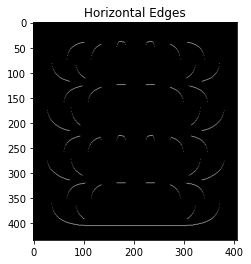

In [7]:
url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures13_14_15_16_17_18/ib3logo.png'
amg = imageio.imread(url, as_gray=True).astype(np.uint8)

bmg = abs(amg - nd.shift(amg,(1,0),order=0))

plt.title('Horizontal Edges')
plt.imshow(-bmg, cmap='gray')
plt.show()

<br><br><br><br><br>
2.  Apply the DoG filter to the ib3logo.png image with sigma1=2 and sigma2=4. Display the beginning and final images.

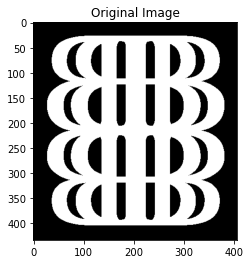

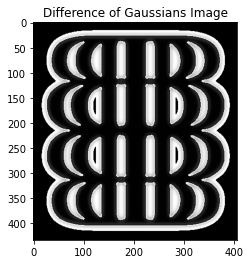

In [18]:
bmg = DoGFilter(amg, 2, 4)

plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

plt.title('Difference of Gaussians Image')
plt.imshow(bmg, cmap='gray')
plt.show()

<br><br><br><br><br>
3.  Apply the Harris filter to the ib3logo.png image. Display the beginning and final images.

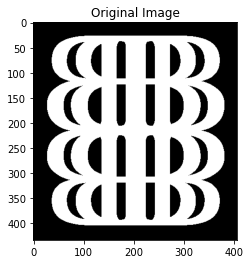

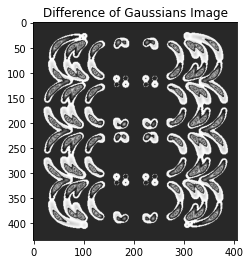

In [21]:
bmg = Harris(amg)

plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

plt.title('Harris Filter Image')
plt.imshow(bmg, cmap='gray')
plt.show()

<br><br><br><br><br>
4.  Create an image with frame size (512,512). Place in this image a solid black circle with a radius of 50 at location (200,200). Place another solid circle with a radius of 50 at location (350,350). Compute the Hough circle transform of the two images of radius 50.

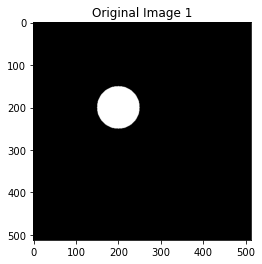

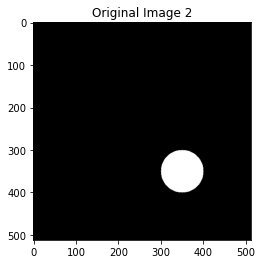

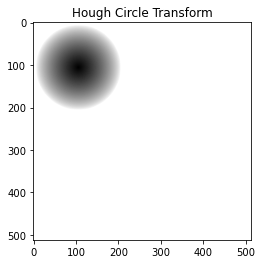

In [39]:
adata = Circle((512,512), (200,200), 50)
bdata = Circle((512,512), (350,350), 50)

cdata = Correlate2D(adata, bdata)

plt.title('Original Image 1')
plt.imshow(adata, cmap='gray')
plt.show()

plt.title('Original Image 2')
plt.imshow(bdata, cmap='gray')
plt.show()

plt.title('Hough Circle Transform')
plt.imshow(-(np.sqrt(abs(cdata))), cmap='gray')
plt.show()

<br><br><br><br><br>
5.  Describe your results.

From what I understand, I just used a hough tranform to find circles in an image. However. I don't know why I'm getting the output I've got, and it's even more confusing that everything looks the way it does.

<br><br><br><br><br>
6.  Write 3 final exam questions.  The questions can be of the form multiple choice, true/false, or short answer.  The question should be well formed and include the correct answer.

<b> Question: What does PCA stand for?
<br></b>  Answer: Principal Component Analysis

<b> Question: What is a DoG filter primaily used for?
<br></b>  Answer: Edge Detection

<b> Question: What is the transform called which takes a time-based pattern, measures every possible cycle, and returns the overall cycle recipe of a function? This transform is often used for image processing in order to access image frequencies.<br></b> 
    Answer: Fourier transform